In [1]:
import pandas as pd

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
appliances = ["hvac","dr"]
out = {}
count=0
for appliance in appliances:
    out[appliance]={}
    for feature in ["Monthly","Static", "Monthly+Static"]:
        out[appliance][feature]={}
        for num_homes in range(7, 28, 3):
            out[appliance][feature][num_homes] = {}
            t = []
            for start_seed in range(0, 100, 1):
                stop_seed = start_seed+1
                try:
                    t.append(pd.read_csv("../sensitivity-data/%s_%d_%d_%d_%s.csv" %(appliance, 
                                                                               num_homes, 
                                                                               start_seed, 
                                                                              stop_seed,
                                                                              feature), index_col=0))
                except:
                    count=count+1
            out[appliance][feature][num_homes] = pd.concat(t)

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
means = {}
sems = {}
for appliance in ["hvac","dr"]:
    means[appliance] = {}
    sems[appliance] = {}
    for feature in ["Monthly","Static", "Monthly+Static"]:
        means[appliance][feature] ={}
        sems[appliance][feature] ={}
        for num_homes in range(7, 28, 3):
            means[appliance][feature][num_homes] = out[appliance][feature][num_homes].mean(axis=1).mean()
            sems[appliance][feature][num_homes] = out[appliance][feature][num_homes].mean(axis=1).sem()

In [6]:
from common_functions import latexify, format_axes

In [7]:
latexify()

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


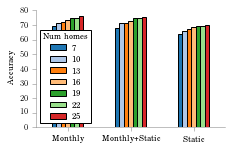

In [29]:
tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)
pd.DataFrame(means["hvac"]).T.plot(kind='bar',rot=0, colors=tableau20blind)
plt.ylim((0, 80))
format_axes(plt.gca())
plt.legend(loc=3, title="Num homes")
plt.ylabel("Accuracy")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-num-homes.pdf", bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-num-homes.png", bbox_inches="tight")

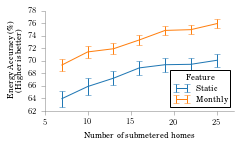

In [19]:
latexify(fig_height=1.8)
tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

means_df = pd.DataFrame(means["hvac"])
sems_df = pd.DataFrame(sems["hvac"])
for i, feature in enumerate(["Static", "Monthly"]):
    plt.errorbar(means_df[feature].index, means_df[feature].values, 
                 yerr=sems_df[feature].values, label=feature, color=tableau20blind[i*2])
#.plot(kind='line',rot=0, colors=tableau20blind[::2])
plt.ylim((0, 80))
format_axes(plt.gca())
plt.legend(loc=4, title="Feature")
plt.ylim((62, 78))
plt.xlim((5, 27))
plt.ylabel("Energy Accuracy (\%)\n(Higher is better)")
plt.xlabel("Number of submetered homes")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-num-homes.pdf", bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-num-homes.png", bbox_inches="tight")

In [73]:
sems['hvac']['Monthly']

{7: 0.94894521834191836,
 10: 0.9214855050810854,
 13: 0.84390457635734284,
 16: 0.83272470986922309,
 19: 0.74885620023534805,
 22: 0.7162143530268883,
 25: 0.75442630344736339}

In [30]:
pd.DataFrame(means["hvac"])

,Monthly,Monthly+Static,Static
7,69.317539,68.125346,63.959098
10,71.401634,71.374832,65.891212
13,71.907825,71.489441,67.218963
16,73.308370,72.864106,68.859176
19,74.827401,74.627267,69.365677
22,74.950223,74.610141,69.429724
25,75.904993,75.397690,70.063741
